<a href="https://colab.research.google.com/github/sidhant0720/Sentiment_Analysis_NLP/blob/master/sentiment_analysis_logistic-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# Text Pre Processing 

In [2]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

In [3]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [4]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [5]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))


Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


In [6]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@KhushbooZG I heard lot of good things about this movie..will definitely watch it :)
@blockedmefat dont unstan tay :( never please


In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

Noise Removal - removing 'RT' , links , # 

In [9]:
def RemoveLinksHash(t):
  t_cleaned = re.sub(r'^RT[\s]+', '', t)
  t_cleaned = re.sub(r'https?:\/\/.*[\r\n]*', '', t_cleaned)
  t_cleaned = re.sub(r'#', '', t_cleaned)
  return(t_cleaned)



In [10]:
test_tweet = all_positive_tweets[2277]
print(all_positive_tweets[2277])
print(RemoveLinksHash(all_positive_tweets[2277]))
test_tweet=RemoveLinksHash(all_positive_tweets[2277])

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenize the String

In [11]:
def TokenizeTweet(t):
  tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
  t_tokens=tokenizer.tokenize(t)
  return t_tokens

In [12]:
test_tweet=TokenizeTweet(test_tweet)
print(test_tweet)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


Remove Stop words and Punctuations

In [13]:
stopwords_english=stopwords.words('english')
print(stopwords_english)
print(string.punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
def RemoveStopWordsPunctuations(t):
  t_updated=[]
  for word in t:
    if(word not in stopwords_english and word not in string.punctuation):
      t_updated.append(word)
  return t_updated  

In [15]:
test_tweet=RemoveStopWordsPunctuations(test_tweet)
print(test_tweet)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


Stemming

In [16]:
def StemTweet(t):
  stemmer = PorterStemmer()
  tweet_stem=[]

  for word in t:
    stem_word=stemmer.stem(word)
    tweet_stem.append(stem_word)
  return tweet_stem

In [17]:
test_tweet=StemTweet(test_tweet)
print(test_tweet)

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [18]:
def processTweets(t):
  processedTweets=[]
  count=0;
  for tweet in t:
    #count+=1
    #print("count = ",count)
    t2=RemoveLinksHash(tweet)
    t2=TokenizeTweet(t2)
    t2=RemoveStopWordsPunctuations(t2)
    t2=StemTweet(t2)
    processedTweets.append(t2)
    #print(processedTweets)

  return processedTweets






In [19]:
processTweets(all_positive_tweets[200:205])

[['anyway', ':-)'],
 ['itti', 'bitti', 'teeni', 'bikini', ':)'],
 ['join',
  'hushedpinwithsammi',
  'event',
  ':D',
  'might',
  'get',
  'text',
  'day',
  'luv',
  'u'],
 ['alway',
  'much',
  'fun',
  '4th',
  'hour',
  'get',
  'togeth',
  ':)',
  'end',
  'night',
  'ice',
  'cream',
  'xfile',
  'content'],
 ['easi', ':D']]

In [20]:
def processTweet(t):
  processedTweets=[]

  t2=RemoveLinksHash(t)
  t2=TokenizeTweet(t2)
  t2=RemoveStopWordsPunctuations(t2)
  t2=StemTweet(t2)
    
    #print(processedTweets)

  return t2

# Building and Visualizing word frequencies

In [21]:
import numpy as np

In [22]:
tweets=all_positive_tweets+all_negative_tweets
print("Number of total tweets = ",len(tweets))

Number of total tweets =  10000


In [23]:
labels = np.append(np.ones((len(all_positive_tweets))),np.zeros(len(all_negative_tweets)))

In [24]:
def build_freqs(tweets,ys):
  """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
  yslist = np.squeeze(ys).tolist()


  freqs={}
  for y,tweet in zip(yslist,tweets):
    for word in processTweet(tweet):
      pair=(word,y)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair]=1
  return freqs

In [25]:
freqs = build_freqs(tweets,labels)

In [26]:
# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

print(freqs[('week',1.0)])

type(freqs) = <class 'dict'>
len(freqs) = 13075
83


In [75]:
print(freqs[('followfriday', 1.0)])

23


In [28]:
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']
data = []
for word in keys:

    pos = 0
    neg = 0
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    data.append([word, pos, neg])
    
data

[['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0, flags=flags)


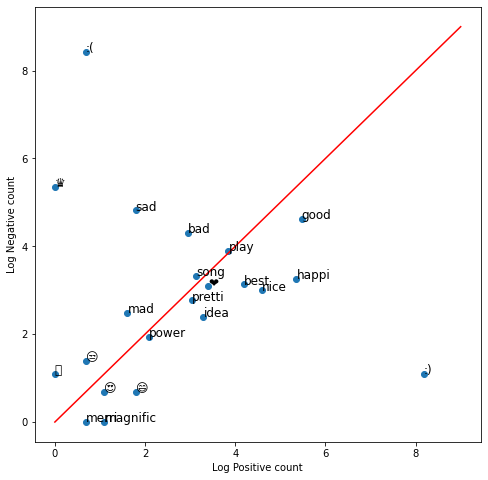

In [29]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  
y = np.log([x[2] + 1 for x in data]) 

ax.scatter(x, y)  

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

# Extracting Features

In [30]:
from os import getcwd
import pandas as pd                 # Library for Dataframes 


In [32]:
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


In [33]:
freqs = build_freqs(train_x, train_y)

print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11345


In [34]:
def sigmoid(z):    
    h = 1 / ( 1 + np.exp(-z))       
    return h

x: matrix of features which is (m,n+1) 
y: corresponding labels of the input matrix x, dimensions (m,1)
theta: weight vector of dimension (n+1,1)

In [43]:
def gradientDescent(x,y,theta,alpha,num_iters,print_cost=True):
  m=x.shape[0]
  for i in range(num_iters):
    z=np.dot(x,theta)
    h=sigmoid(z)
    J = -(((np.dot(y.T,np.log(h)))+(np.dot((1-y).T,np.log((1-h))))))*(1.0/m)
    theta = theta - (alpha*(np.dot(x.T,(h-y)))) *(1.0/m)
    if(i%100==0):
      print("iteration number :",i," cost : ",J[0])
  
  J=float(J)
  return J,theta

In [40]:
def extract_features(tweet,freq):
  tweet_1=processTweet(tweet)
  x=np.zeros((1,3))
  x[0,0]=1
  for word in tweet_1:
    x[0,1] += freqs.get((word,1.0),0)
    x[0,2] += freqs.get((word,0.0),0)
  assert(x.shape == (1, 3))
  return x

# Training Model

In [51]:

X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    
    X[i, :]= extract_features(train_x[i], freqs)
print(extract_features(train_x[500], freqs))
print(X[500])
print(X.shape)

Y = train_y
print(train_y.shape)

[[  1. 501.   2.]]
[  1. 501.   2.]
(8000, 3)
(8000, 1)


In [67]:
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

iteration number : 0  cost :  [0.69314718]
iteration number : 100  cost :  [0.60054966]
iteration number : 200  cost :  [0.53095934]
iteration number : 300  cost :  [0.47715656]
iteration number : 400  cost :  [0.43448393]
iteration number : 500  cost :  [0.39990529]
iteration number : 600  cost :  [0.37137741]
iteration number : 700  cost :  [0.34748093]
iteration number : 800  cost :  [0.32720163]
iteration number : 900  cost :  [0.3097966]
iteration number : 1000  cost :  [0.29471002]
iteration number : 1100  cost :  [0.2815182]
iteration number : 1200  cost :  [0.2698929]
iteration number : 1300  cost :  [0.25957616]
iteration number : 1400  cost :  [0.25036269]
The cost after training is 0.24216577.
The resulting vector of weights is [7e-08, 0.0005239, -0.00055517]


# Predicting and Testing

In [53]:
def predict_tweet(tweet, freqs, theta):
  x = extract_features(tweet,freqs)
  y_pred = sigmoid(np.dot(x,theta))
  return y_pred

In [65]:
def test_logistic_regression(test_x, test_y, freqs, theta):

    y_hat = []
    
    for tweet in test_x:
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            y_hat.append(1)
        else:
            y_hat.append(0)
    count=0
    for n in range(len(y_hat)):
        if((np.asarray(y_hat))[n]==np.squeeze(test_y)[n]):
            count+=1
    accuracy = count/len(y_hat)

    return accuracy

In [68]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9950


Predict any tweet - 

In [63]:
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(processTweet(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[[0.48139093]]
Negative sentiment
